In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
picture_size = 48
folder_path = "C:/Users/bhudi/Desktop/New folder/git/Emotion_Detection/images/images/"

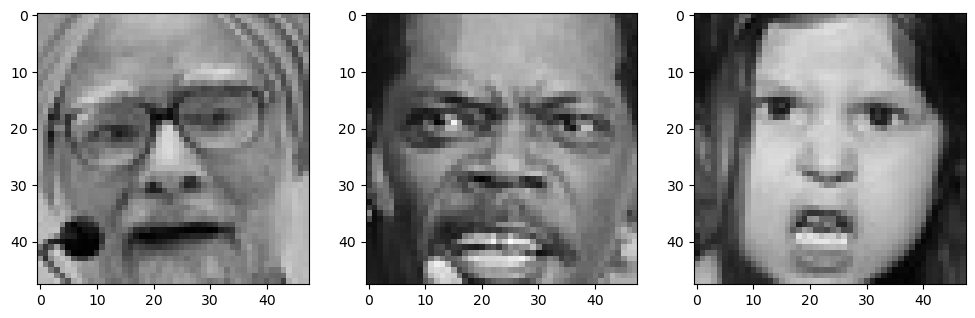

In [3]:
from keras.preprocessing.image import load_img, img_to_array

expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 4, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
from keras.optimizers import Adam,SGD,RMSprop
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPool2D

no_of_classes = 7

model = Sequential()

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



In [6]:
import tensorflow as tf
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

callbacks_list = [early_stopping,checkpoint]

In [8]:
model.fit_generator(generator=train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=50,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=callbacks_list)

C:\Users\bhudi\AppData\Local\Temp\ipykernel_22220\2478472238.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=50,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=callbacks_list)


Epoch 1/50
 17/225 [=>............................] - ETA: 5:25 - loss: 2.3582 - accuracy: 0.1751

KeyboardInterrupt: 

In [9]:
from tensorflow.keras.models import load_model

model_path = "C:/Users/bhudi/Desktop/New folder/git/Emotion_Detection/model.h5"

loaded_model = load_model(model_path)

loaded_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_11 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_11 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                    

In [10]:
import cv2

In [12]:
fc=cv2.CascadeClassifier("C:/Users/bhudi/Desktop/New folder/git/Emotion_Detection/haarcascade_frontalface_default.xml")

In [15]:
def det_face_vid(img):
    face = img.copy()
    rects = fc.detectMultiScale(face, scaleFactor=1.2, minNeighbors=5)
    for (x, y, w, h) in rects:
        cv2.rectangle(face, (x, y), (x + w, y + h), (0, 255, 0), 5)
    return face, len(rects)

In [16]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image


emotion_model = load_model("C:/Users/bhudi/Desktop/New folder/git/Emotion_Detection/model.h5")  

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame, num_faces = det_face_vid(frame)
    faces = fc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        roi = roi_gray.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        emotion_prediction = emotion_model.predict(roi)[0]
        emotion_label = emotion_labels[np.argmax(emotion_prediction)]

        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.putText(frame, f'Faces Detected: {num_faces}', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow('Emotion Detection', cv2.resize(frame, (800, 600)))

    if cv2.waitKey(1) ==27:
        break
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 9ms/step
